# Preprocessing VDJdb data
This notebook shows how data exported from VDJdb \[1\] can be preprocessed for TCRconv. V- and J-genes are required for better performance. Similarly, also other TCR-seq data can be used. Here only human TCR-sequences have been utilized. It is also possible to use TCRs from other organisms, if the amino acid sequences corresponding to their V- and J- genes are obtained from IMGT \[2\]. Here it is shown how the three datasets presented in the paper are constructed.


\[1\] Bagaev, Dmitry V., et al. VDJdb in 2019: database extension, new analysis infrastructure and a T-cell receptor motif compendium." *Nucleic Acids Research* **48.D1** (2020): D1057-D1062. https://vdjdb.cdr3.net \
\[2\] Lefranc, Marie-Paule, et al. "IMGT, the international ImMunoGeneTics information system." *Nucleic acids research* **37.suppl_1** (2009): D1006-D1012. https://www.imgt.org

## Preliminaries

In [1]:
import prep 
import numpy as np
import pandas as pd

In [2]:
# Optional, use seaborn styles
from seaborn import set_style
set_style('ticks')

In [3]:
# Amino acid and nucleotide sequences corresponding to Vb & Jb and Va & Ja genes
# used for constructing the complete TCR (i.e. V(D)J) sequences based on V- and J-genes and CDR3
protVb,protJb,_,_ = prep.get_protseqs_ntseqs(chain='B')
protVa,protJa,_,_ = prep.get_protseqs_ntseqs(chain='A')

## Developing Pipeline for TCRB Sequences from the Updated Database

In [4]:
df = pd.read_csv('../db/vdjdb_2021_1_11.tsv', delimiter='\t')
df.head()

,complex.id,Gene,CDR3,V,J,Species,MHC A,MHC B,MHC class,Epitope,Epitope gene,Epitope species,Reference,Method,Meta,CDR3fix,Score
0,0,TRB,CSVWGTGKTYEQYF,TRBV29-1*01,TRBJ2-7*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""19/75"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSVWGTGKTYEQYF"", ""cdr3_old"": ""CSVWGT...",1
1,0,TRB,CSVWGEGRSYEQYF,TRBV29-1*01,TRBJ2-7*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""5/75"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSVWGEGRSYEQYF"", ""cdr3_old"": ""CSVWGE...",1
2,0,TRB,CSATILAGVPYGEQYF,TRBV20-1*01,TRBJ2-7*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""17/75"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSATILAGVPYGEQYF"", ""cdr3_old"": ""CSAT...",1
3,0,TRB,CSASEGTSSYEQYF,TRBV20-1*01,TRBJ2-7*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""1/75"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CSASEGTSSYEQYF"", ""cdr3_old"": ""CSASEG...",0
4,0,TRB,CASSFDREVTGELFF,TRBV7-3*01,TRBJ2-2*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:17287271,"{""frequency"": ""7/75"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFDREVTGELFF"", ""cdr3_old"": ""CASSF...",1


In [5]:
df2 = pd.read_csv('../db/new_db/vdjdb-2023-06-01/vdjdb.txt', delimiter='\t')
df2.head()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no


In [6]:
datafile = '../db/new_db/vdjdb-2023-06-01/vdjdb.txt'
tcrs_vdj,epis_u,num_epis = prep.get_tcr_dict(datafile,chain='B', min_tcrs_per_epi=50)

66 epitopes, 36627 TCRs


We've modified the `get_tcr_dict` effectively and its now ostensibly loading epitopes and TCRs. We'll next try to apply their plot function and see if it shows something similar.

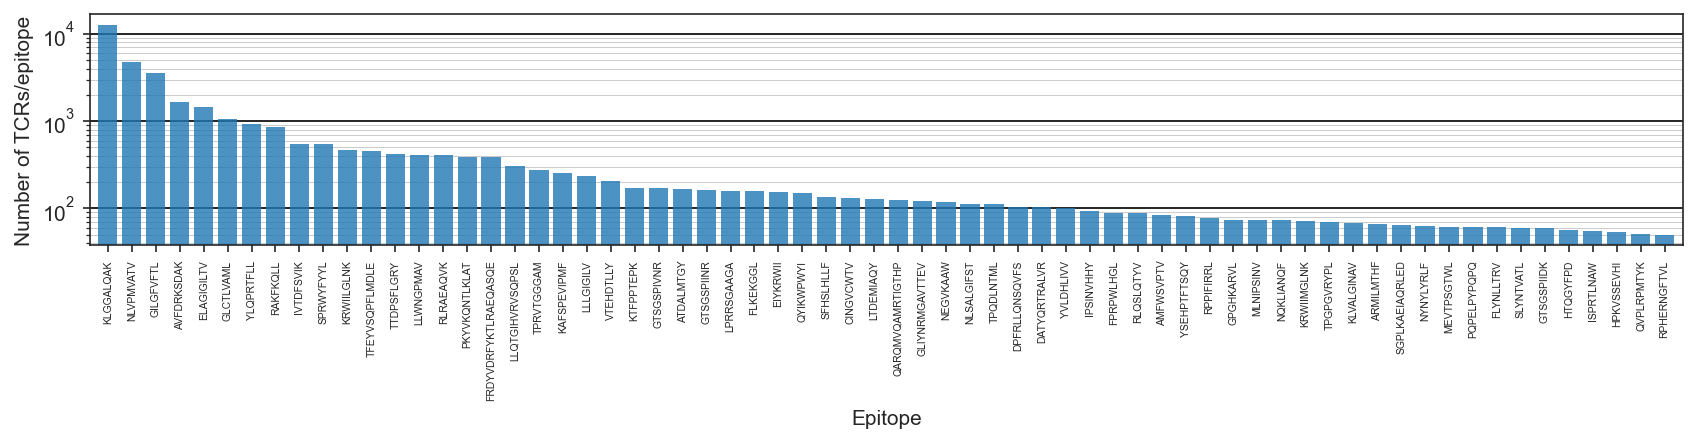

In [7]:
prep.plot_tcrs_per_epitope(epis_u,num_epis)

That worked; will next try using their `get_unqiue_tcr_dict` function which I am worried will struggle with missing sequences.

In [8]:
tcru_dict = prep.get_unique_tcr_dict(tcrs_vdj,'B',vbseqs=protVb,jbseqs=protJb)
print('Number of unique TCRs:', len(tcru_dict))

Number of unique TCRs: 34699


Suprisingly this seems to have worked! In their pipeline they next write to disk for the next step.

In [11]:
# Write to file
prep.write_data_to_file(tcru_dict,'../training_data/vdjdb-b-NEWDB.csv',chain='B')

Then they load it into an array and generate labels. 

In [12]:
filename = '../training_data/vdjdb-b-NEWDB.csv'
epis = np.loadtxt(filename,usecols=(0),unpack=True,delimiter=',',skiprows=1,comments=None,dtype='str')
epis_u,labels = prep.get_labels(epis)

We next apply their fold generation code.

1.0 
Fold sizes [3470 3470 3470 3470 3470 3470 3470 3470 3470 3469]
Fold size, median: 3470.0, max deviation: 1.0


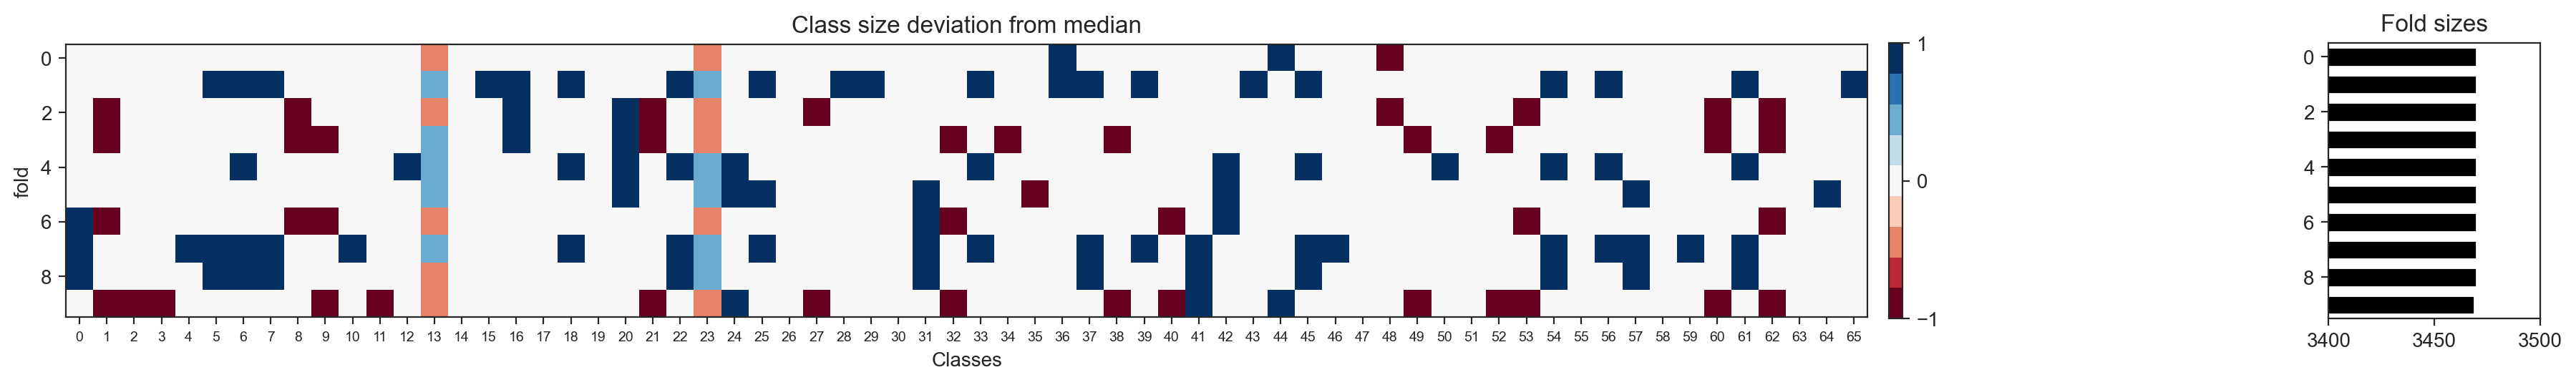

In [16]:
# We'll assign TCRs randomly to each fold so that the number of TCRs recognizing each epitope 
# is as similar as possible. As there are cross-reacting TCRs the number of TCRs in each fold
# can therefore vary. We'll repeat this random assignment multiple times to get also similar fold sizes.
# Finally, we inspect the balance.
maxdev=100
while maxdev>1:
    try:
        folds = prep.get_folds(labels,orderby='xreact',k=10)
    except:
        pass
    tmp = np.asarray([np.sum(folds==i) for i in range(10)])
    med = np.median(tmp)
    maxdev=np.max(np.abs(tmp-med))
    print(maxdev,end=' ')
print('')
print('Fold sizes', tmp)
    
prep.checkFoldBalance(labels,folds,10)

They then save their matrices for later.

In [17]:
# Save folds, and list of unique epitopes
np.save('../training_data/folds_vdjdb-b-large-NEWDB.npy',folds)
np.save('../training_data/unique_epitopes_vdjdb-b-large-NEWDB.npy',epis_u)

Finally we can see if their cross reactivity code works with this data.

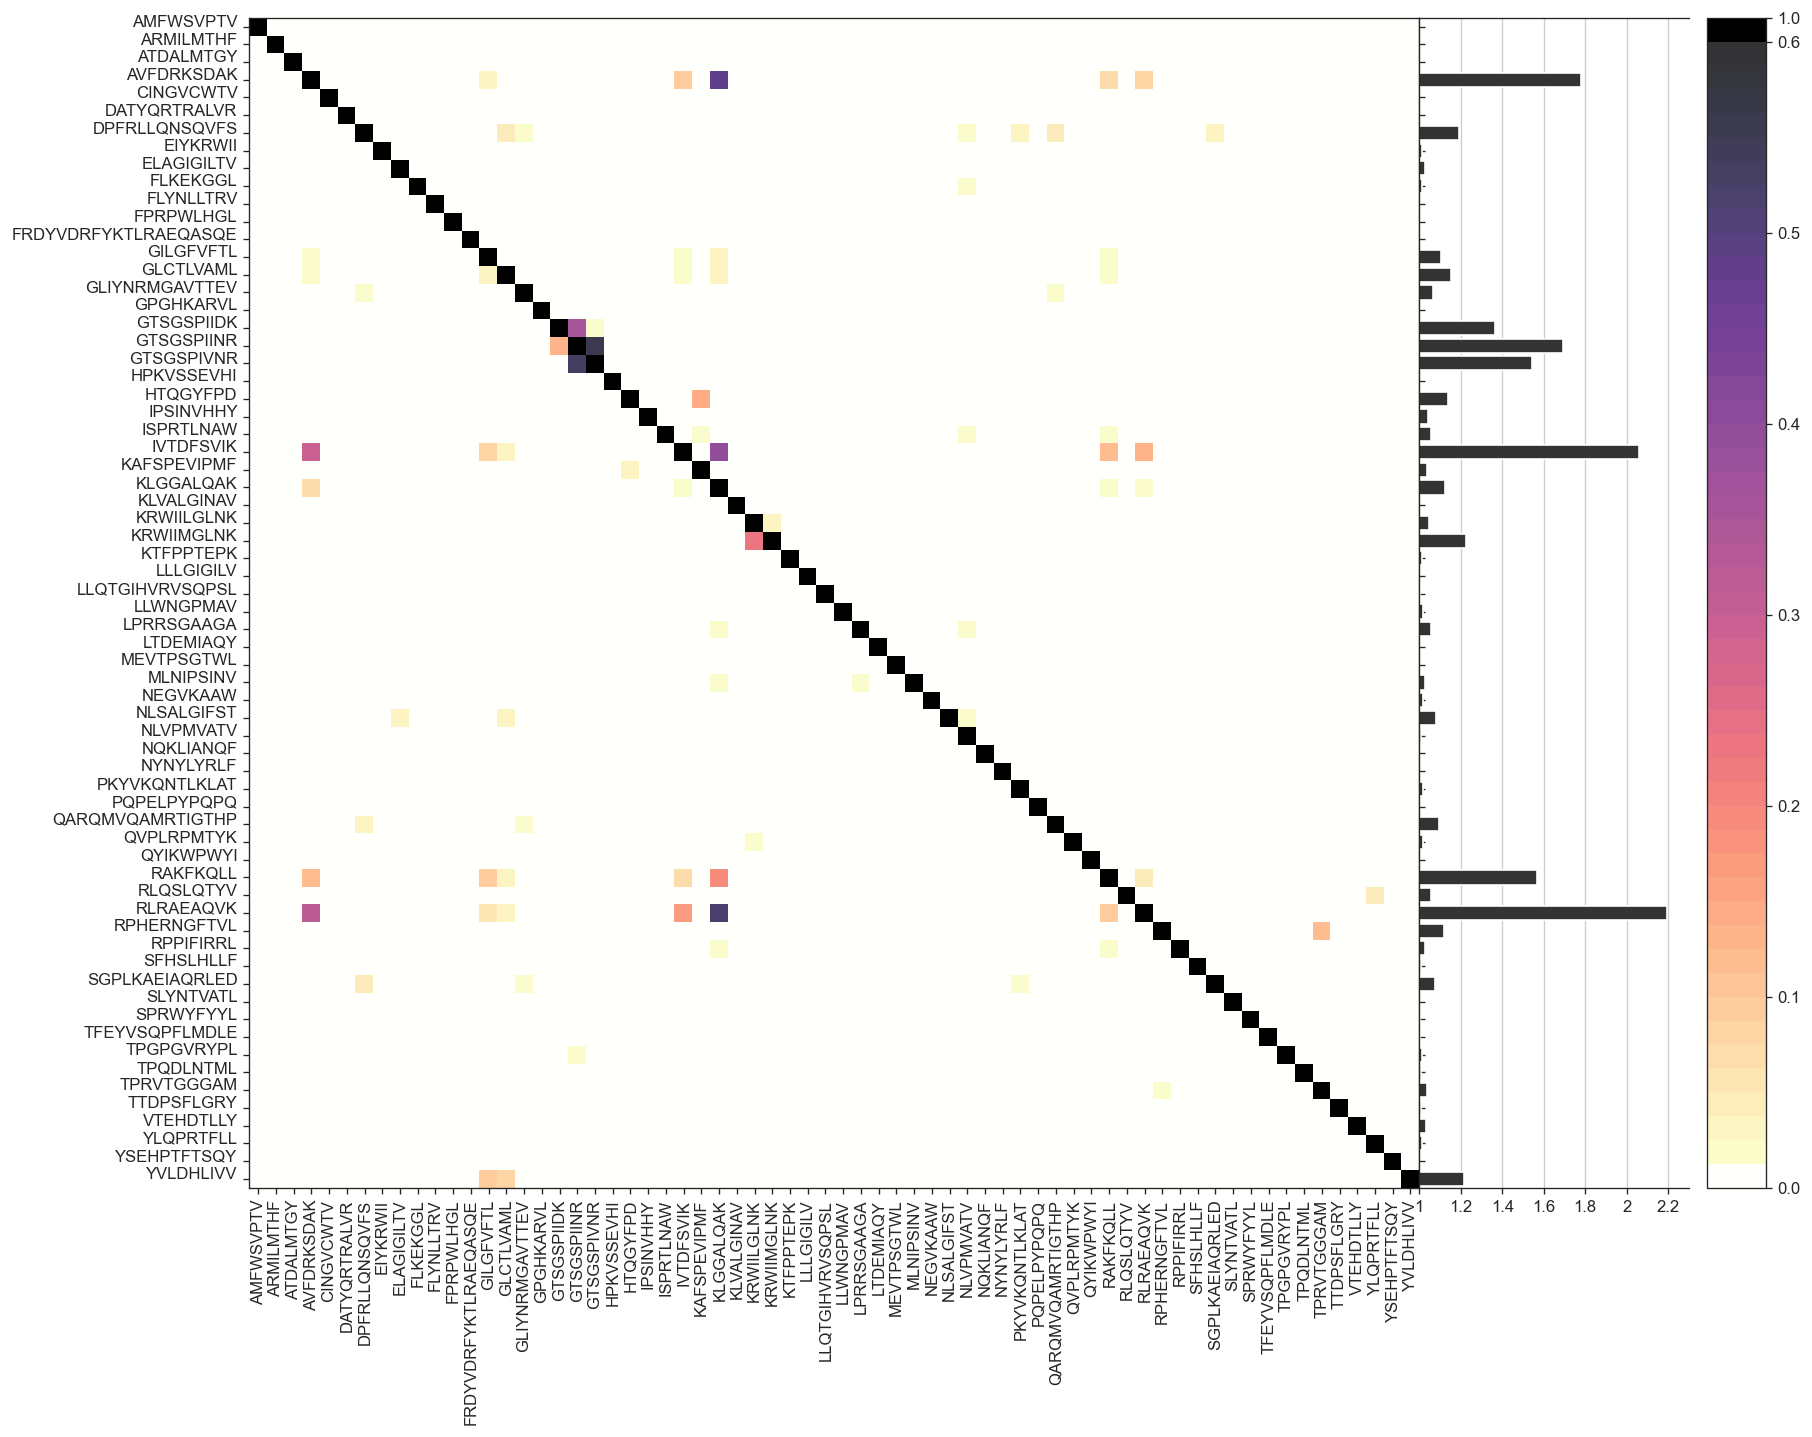

In [18]:
occmat = prep.get_occmat(epis,epis_u)
prep.plot_cross_reactivity(occmat,epis_u,fs=(15,15),dpi=120,bar_lim=2.2) 

Alright- this has ostensibly worked. We can likely use these outputs to develop embeddings.

## Data sets with only TCRB-sequences

### VDJdbB-large
Comprehensive TCR$\beta$ dataset with all confidence scores. (min 50 TCR/epitope). Downloaded in January 2021.

In [ ]:
# Read sequence data downloaded from VDJdb to dictionary and select epitopes for which there are at least
# min_tcrs_per_epi
datafile = '../db/vdjdb_2021_1_11.tsv' # Exported from VDJdb
tcrs_vdj,epis_u,num_epis = prep.get_tcr_dict(datafile,chain='B', min_tcrs_per_epi=50)

In [ ]:
prep.plot_tcrs_per_epitope(epis_u,num_epis)

In [ ]:
tcru_dict = prep.get_unique_tcr_dict(tcrs_vdj,'B',vbseqs=protVb,jbseqs=protJb)
print('Number of unique TCRs:', len(tcru_dict))

In [ ]:
# Write to file
prep.write_data_to_file(tcru_dict,'../training_data/vdjdb-b-large.csv',chain='B')

In [ ]:
filename = '../training_data/vdjdb-b-large.csv'
epis = np.loadtxt(filename,usecols=(0),unpack=True,delimiter=',',skiprows=1,comments=None,dtype='str')
epis_u,labels = prep.get_labels(epis)

In [ ]:
# We'll assign TCRs randomly to each fold so that the number of TCRs recognizing each epitope 
# is as similar as possible. As there are cross-reacting TCRs the number of TCRs in each fold
# can therefore vary. We'll repeat this random assignment multiple times to get also similar fold sizes.
# Finally, we inspect the balance.
maxdev=100
while maxdev>1:
    try:
        folds = prep.get_folds(labels,orderby='xreact',k=10)
    except:
        pass
    tmp = np.asarray([np.sum(folds==i) for i in range(10)])
    med = np.median(tmp)
    maxdev=np.max(np.abs(tmp-med))
    print(maxdev,end=' ')
print('')
print('Fold sizes', tmp)
    
prep.checkFoldBalance(labels,folds,10)

In [ ]:
# Save folds, and list of unique epitopes
np.save('../training_data/folds_vdjdb-b-large.npy',folds)
np.save('../training_data/unique_epitopes_vdjdb-b-large.npy',epis_u)

In [ ]:
occmat = prep.get_occmat(epis,epis_u)
prep.plot_cross_reactivity(occmat,epis_u,fs=(15,15),dpi=120,bar_lim=2.2) 

### VDJdbB-small
Small high quality dataset (min confidence score 1, min 40 TCR/epitope). Downloaded in January 2021.

In [ ]:
# Read sequence data downloaded from VDJdb to dictionary and select epitopes for which there are at least
# min_tcrs_per_epi
tcrs_vdj,epis_u,num_epis = prep.get_tcr_dict('../db/vdjdb_2021_1_11.tsv',chain='B', min_tcrs_per_epi=40,min_score=1)

In [ ]:
prep.plot_tcrs_per_epitope(epis_u,num_epis,scale='linear')

In [ ]:
tcru_dict= prep.get_unique_tcr_dict(tcrs_vdj,chain='B',vbseqs=protVb,jbseqs=protJb)
print('Number of unique TCRs:',len(tcru_dict))

In [ ]:
# Write to file
prep.write_data_to_file(tcru_dict,'../training_data/vdjdb-b-small.csv',chain='B')

In [ ]:
filename = '../training_data/vdjdb-b-small.csv'
epis = np.loadtxt(filename,usecols=(0),unpack=True,delimiter=',',skiprows=1,comments=None,dtype='str')
epis_u,labels = prep.get_labels(epis)

In [ ]:
# We'll assign TCRs randomly to each fold so that the number of TCRs recognizing each epitope 
# is as similar as possible. As there are cross-reacting TCRs the number of TCRs in each fold
# can therefore vary. We'll repeat this random assignment multiple times to get also similar fold sizes.
# Finally, we inspect the balance.
maxdev=100
while maxdev>1:
    folds = prep.get_folds(labels,orderby='class-size',k=10)
    tmp = np.asarray([np.sum(folds==i) for i in range(10)])
    med = np.median(tmp)
    maxdev=np.max(np.abs(tmp-med))
    print(maxdev,end=' ')
print('')
print('Fold sizes', tmp)
    
prep.checkFoldBalance(labels,folds,10)

In [ ]:
# Save folds, and list of unique epitopes
np.save('../training_data/folds_vdjdb-b-small.npy',folds)
np.save('../training_data/unique_epitopes_vdjdb-b-small.npy',epis_u)

In [ ]:
occmat = prep.get_occmat(epis,epis_u)
prep.plot_cross_reactivity(occmat,epis_u,fs=(5.5,5.5),dpi=120,bar_lim=1.6) 

## Data set with paired TCRAB-sequences
### VDJdbAB-large
Comprehensive paired TCR$\alpha\beta$ dataset consisting of TCRs with all confidence scores.

In [ ]:
# Read sequence data downloaded from VDJdb to dictionary and select epitopes for which there are at least
# min_tcrs_per_epi
tcrs_vdj,epis_u,num_epis = prep.get_tcr_dict('../db/vdjdb-ab-2021-9.tsv',chain='AB', min_tcrs_per_epi=50)

In [ ]:
prep.plot_tcrs_per_epitope(epis_u,num_epis)

In [ ]:
tcru_dict = prep.get_unique_tcr_dict(tcrs_vdj,'AB',protVb,protJb,protVa,protJa)
print('Number of unique TCRs',len(tcru_dict))

In [ ]:
# Write to file
prep.write_data_to_file(tcru_dict,'../training_data/vdjdb-ab-large.csv',chain='AB')

In [ ]:
filename = '../training_data/vdjdb-ab-large.csv'
epis = np.loadtxt(filename,usecols=(0),unpack=True,delimiter=',',skiprows=1,comments=None,dtype='str')
epis_u,labels = prep.get_labels(epis)

In [ ]:
# We'll assign TCRs randomly to each fold so that the number of TCRs recognizing each epitope 
# is as similar as possible. As there are cross-reacting TCRs the number of TCRs in each fold
# can therefore vary. We'll repeat this random assignment multiple times to get also similar fold sizes.
# Finally, we inspect the balance.
maxdev=100
while maxdev>2:
    folds = prep.get_folds(labels,orderby='class-size',k=10)
    tmp = np.asarray([np.sum(folds==i) for i in range(10)])
    med = np.median(tmp)
    maxdev=np.max(np.abs(tmp-med))
    print(maxdev,end=' ')
print('')
print('Fold sizes', tmp)
    
prep.checkFoldBalance(labels,folds,10)

In [ ]:
# Save folds, and list of unique epitopes
np.save('../training_data/folds_vdjdb-ab-large.npy',folds)
np.save('../training_data/unique_epitopes_vdjdb-ab-large.npy',epis_u)

In [ ]:
occmat = prep.get_occmat(epis,epis_u)
prep.plot_cross_reactivity(occmat,epis_u,fs=(5,5),dpi=120,bar_lim=2)